In [155]:
# 產生資料
import numpy as np #科學運算
import matplotlib.pyplot as plt #繪圖工具
from matplotlib.colors import ListedColormap #上色工具
from sklearn import neighbors, datasets

from sklearn.datasets.samples_generator import make_classification #X為樣本特徵,y
X, y = make_classification(n_samples = 2, n_features = 2,  n_informative=2, n_redundant = 0, n_classes = 2) # n_classes為類別, n_informative為資訊量; n_informative, n_redundant, n_repeated總和要小於n_feature

In [156]:
X #顯示出隨機產生的座標


array([[-2.16645543, -1.38982955],
       [ 0.82084734, -1.05856643]])

In [157]:
y #兩點各代表一個類別,第一類用"0"表示,第二類用"1"表示

array([0, 1])

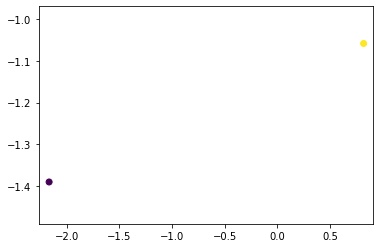

In [158]:
# 使用KNN分類
clf = neighbors.KNeighborsClassifier(n_neighbors = 1) #建立模型設定K值是基數 因為KNN採多數決 基數較好分類
clf.fit(X, y) #用KNN來擬合模型,我們選擇K=1，權重為距離遠近
h = 0.02 #網路中的步長 確認訓練集的邊界 生成隨機數據來做測試集, 然後做預測
x_min, x_max = X[:, 0].min()-0.1 ,X[:, 0].max()+0.1 #算出x軸所有可能的範圍
y_min, y_max = X[:, 1].min()-0.1 ,X[:, 1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #建立取樣點 生成以某點為中心指定半徑内 輸入的x，y，就是網格點的橫縱座標列向量（非矩陣）輸出的X，Y，就是座標矩陣
#計算所有資料到K的距離
plt.scatter(X[:,0], X[:,1], marker='o', c=y)
plt.xlim(xx.min(), xx.max()) #顯示x
plt.ylim(yy.min(), yy.max()) #顯示y
plt.show() #根據隨機生成樣本不同，圖形也不同

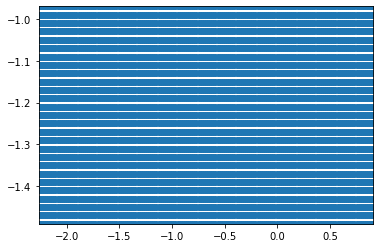

In [159]:
plt.scatter(xx[:], yy[:], marker = 'o')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show() #根據隨機生成樣本不同，圖形也不同

In [160]:
xx #結果顯示 每個點與每個點間差 h=0.02 ;此結果顯示x每次重新產出可能的範圍 新的x產出後將在這個範圍內

array([[-2.26645543, -2.24645543, -2.22645543, ...,  0.87354457,
         0.89354457,  0.91354457],
       [-2.26645543, -2.24645543, -2.22645543, ...,  0.87354457,
         0.89354457,  0.91354457],
       [-2.26645543, -2.24645543, -2.22645543, ...,  0.87354457,
         0.89354457,  0.91354457],
       ...,
       [-2.26645543, -2.24645543, -2.22645543, ...,  0.87354457,
         0.89354457,  0.91354457],
       [-2.26645543, -2.24645543, -2.22645543, ...,  0.87354457,
         0.89354457,  0.91354457],
       [-2.26645543, -2.24645543, -2.22645543, ...,  0.87354457,
         0.89354457,  0.91354457]])

In [161]:
#Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF']) #給不同的區域賦以顏色
cmap_bold = ListedColormap(['r', 'b']) #給不同的屬性的點顏色 將預測結果在平面座標顯示

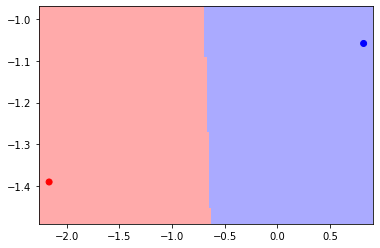

In [163]:
#Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF']) #給不同的區域賦以顏色
cmap_bold = ListedColormap(['r', 'b']) #給不同的屬性的點顏色 將預測結果在平面座標顯示
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])#模型預測
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light) #也畫出所有的訓練數據
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()